<a href="https://colab.research.google.com/github/macwolfz/Magaly_Project/blob/main/HAARDetectorVideo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GPU

In [ ]:
!nvidia-smi

Wed Jun 15 13:45:21 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
import tensorflow as tf
#sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))
tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 141797739147004944
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14465892352
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15939770116281123928
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

#Download Dataset Kaggle

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zajindaz","key":"147e1fb85839b4b69870c364b798c59f"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d msambare/fer2013

 71% 43.0M/60.3M [00:01<00:00, 37.5MB/s]
100% 60.3M/60.3M [00:01<00:00, 47.9MB/s]


In [ ]:
! mkdir fer2013
! unzip "/content/fer2013.zip" -d fer2013

Streaming output truncated to the last 5000 lines.
  inflating: fer2013/train/sad/Training_65242339.jpg  
  inflating: fer2013/train/sad/Training_65267116.jpg  
  inflating: fer2013/train/sad/Training_65275626.jpg  
  inflating: fer2013/train/sad/Training_6529266.jpg  
  inflating: fer2013/train/sad/Training_65329617.jpg  
  inflating: fer2013/train/sad/Training_65338712.jpg  
  inflating: fer2013/train/sad/Training_65338797.jpg  
  inflating: fer2013/train/sad/Training_65387162.jpg  
  inflating: fer2013/train/sad/Training_65404494.jpg  
  inflating: fer2013/train/sad/Training_65426218.jpg  
  inflating: fer2013/train/sad/Training_65430136.jpg  
  inflating: fer2013/train/sad/Training_65437377.jpg  
  inflating: fer2013/train/sad/Training_6545735.jpg  
  inflating: fer2013/train/sad/Training_65463385.jpg  
  inflating: fer2013/train/sad/Training_65473985.jpg  
  inflating: fer2013/train/sad/Training_65502829.jpg  
  inflating: fer2013/train/sad/Training_65505359.jpg  
  inflating: fer

#Libraries

In [1]:
import cv2 #pip install opencv-python
##pip isntall opencv-contrib-python full package
import matplotlib.pyplot as plt
import os, random
#random.choice(os.listdir("C:\\")) #change dir name to whatever

In [2]:
#!pip install deepface
from deepface import DeepFace

In [3]:
!wget 'https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

--2022-06-17 13:47:03--  https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal     [ <=>                ]   9.73M  --.-KB/s    in 0.1s    

2022-06-17 13:47:04 (84.2 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [10198591]



In [4]:
# import the necessary packages for create Dataset
from imutils import paths
import argparse
import requests
import cv2
import os

#Create Test Dataset

In [38]:
! git clone https://github.com/macwolfz/Magaly_Project.git

Cloning into 'Magaly_Project'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 31 (delta 9), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (31/31), done.


In [39]:
! unzip "/content/Magaly_Project/rosGoo.zip" -d '/content/'

Archive:  /content/Magaly_Project/rosGoo.zip
  inflating: /content/rosGoo/00000000.jpg  
  inflating: /content/rosGoo/00000001.jpg  
  inflating: /content/rosGoo/00000002.jpg  
  inflating: /content/rosGoo/00000003.jpg  
  inflating: /content/rosGoo/00000004.jpg  
  inflating: /content/rosGoo/00000005.jpg  
  inflating: /content/rosGoo/00000006.jpg  
  inflating: /content/rosGoo/00000007.jpg  
  inflating: /content/rosGoo/00000008.jpg  
  inflating: /content/rosGoo/00000009.jpg  
  inflating: /content/rosGoo/00000010.jpg  
  inflating: /content/rosGoo/00000012.jpg  
  inflating: /content/rosGoo/00000013.jpg  
  inflating: /content/rosGoo/00000014.jpg  
  inflating: /content/rosGoo/00000015.jpg  
  inflating: /content/rosGoo/00000018.jpg  
  inflating: /content/rosGoo/00000021.jpg  
  inflating: /content/rosGoo/00000022.jpg  
  inflating: /content/rosGoo/00000023.jpg  
  inflating: /content/rosGoo/00000027.jpg  
  inflating: /content/rosGoo/00000028.jpg  
  inflating: /content/rosGoo/00

In [27]:
#!rm -r '/content/testFaces'

In [28]:
!mkdir created_Dataset
!python '/content/Magaly_Project/dataset/downloadImg.py' --urls'/content/Magaly_Project/dataset/urls.txt' --output Test/created_Dataset

mkdir: cannot create directory ‘created_Dataset’: File exists
usage: downloadImg.py [-h] -u URLS -o OUTPUT
downloadImg.py: error: the following arguments are required: -u/--urls


#Merge test Images

In [ ]:
import os, shutil

# current folder path
current_folder = os.getcwd() 
  
# list of folders to be merged
list_dir = ['/content/fer2013/test/angry', '/content/fer2013/test/disgust', '/content/fer2013/test/fear', '/content/fer2013/test/happy', '/content/fer2013/test/neutral', '/content/fer2013/test/sad', '/content/fer2013/test/surprise']
  
# enumerate on list_dir to get the 
# content of all the folders ans store it in a dictionary
content_list = {}
for index, val in enumerate(list_dir):
    path = os.path.join(current_folder, val)
    content_list[ list_dir[index] ] = os.listdir(path)


# Function to create new folder if not exists
def make_new_folder(folder_name, parent_folder_path):
      
    # Path
    path = os.path.join(parent_folder_path, folder_name)
      
    # Create the folder
    # 'new_folder' in
    # parent_folder
    try: 
        
        # mode of the folder
        mode = 0o777
  
        # Create folder
        os.mkdir(path, mode) 
          
    except OSError as error: 
        print(error)
  
# folder in which all the content 
# will be merged
merge_folder = "/content/fer2013/merge_folder"
  
# merge_folder path - current_folder 
# + merge_folder
merge_folder_path = os.path.join(current_folder, merge_folder) 
  
# create merge_folder if not exists
make_new_folder(merge_folder, current_folder)


# loop through the list of folders
for sub_dir in content_list:
  
    # loop through the contents of the
    # list of folders
    for contents in content_list[sub_dir]:
  
        # make the path of the content to move 
        path_to_content = sub_dir + "/" + contents  
  
        # make the path with the current folder
        dir_to_move = os.path.join(current_folder, path_to_content )
  
        # move the file
        shutil.move(dir_to_move, merge_folder_path)

In [ ]:
#!rm -r '/content/fer2013/merge_folder'

#Counting Data Samples

In [10]:
print(os.listdir("/content/rosGoo"))
print('Total Images for Testing:', len(os.listdir('/content/rosGoo')),'\n')

['00000118.jpg', '00000131.jpg', '00000107.jpg', '00000128.jpg', '00000052.jpg', '00000074.jpg', '00000192.jpg', '00000046.jpg', '00000070.jpg', '00000053.jpg', '00000006.jpg', '00000169.jpg', '00000112.jpg', '00000139.jpg', '00000113.jpg', '00000081.jpg', '00000176.jpg', '00000191.jpg', '00000082.jpg', '00000069.jpg', '00000167.jpg', '00000040.jpg', '00000021.jpg', '00000023.jpg', '00000035.jpg', '00000067.jpg', '00000095.jpg', '00000061.jpg', '00000094.jpg', '00000014.jpg', '00000171.jpg', '00000100.jpg', '00000041.jpg', '00000039.jpg', '00000156.jpg', '00000187.jpg', '00000003.jpg', '00000090.jpg', '00000015.jpg', '00000073.jpg', '00000173.jpg', '00000140.jpg', '00000165.jpg', '00000135.jpg', '00000076.jpg', '00000121.jpg', '00000130.jpg', '00000146.jpg', '00000108.jpg', '00000142.jpg', '00000043.jpg', '00000189.jpg', '00000012.jpg', '00000164.jpg', '00000185.jpg', '00000031.jpg', '00000077.jpg', '00000062.jpg', '00000000.jpg', '00000007.jpg', '00000001.jpg', '00000005.jpg', '000000

In [ ]:
print(os.listdir("/content/fer2013/test"))
merge_folder = os.path.join('/content/fer2013/merge_folder')
angry = os.path.join('/content/fer2013/test/angry/')
disgust = os.path.join('/content/fer2013/test/disgust/')
fear = os.path.join('/content/fer2013/test/fear/')
happy = os.path.join('/content/fer2013/test/happy/')
neutral = os.path.join('/content/fer2013/test/neutral/')
sad = os.path.join('/content/fer2013/test/sad/')
surprise = os.path.join('/content/fer2013/test/surprise/')

print('Total Images for Testing:', len(os.listdir(merge_folder)),'\n')
print('Total Images for "" Class:', len(os.listdir(angry)),'\n')
print('Total Images for "" Class:', len(os.listdir(disgust)),'\n')
print('Total Images for "" Class:', len(os.listdir(fear)),'\n')
print('Total Images for "" Class:', len(os.listdir(happy)),'\n')
print('Total Images for "" Class:', len(os.listdir(neutral)),'\n')
print('Total Images for "" Class:', len(os.listdir(sad)),'\n')
print('Total Images for "" Class:', len(os.listdir(surprise)),'\n')

testing_files = os.listdir(merge_folder)
print(testing_files[:10],'\n')

sad_files = os.listdir(sad)
print(sad[:10],'\n')

disgust = os.listdir(disgust)
print(disgust[:10],'\n')

['neutral', 'happy', 'angry', 'fear', 'sad', 'disgust', 'surprise']
Total Images for Testing: 7178 

Total Images for "" Class: 0 

Total Images for "" Class: 0 

Total Images for "" Class: 0 

Total Images for "" Class: 0 

Total Images for "" Class: 0 

Total Images for "" Class: 0 

Total Images for "" Class: 0 

['PrivateTest_78226388.jpg', 'PrivateTest_35694338.jpg', 'PublicTest_83470129.jpg', 'PublicTest_86587530.jpg', 'PrivateTest_24854147.jpg', 'PrivateTest_40249114.jpg', 'PrivateTest_83521964.jpg', 'PrivateTest_74965837.jpg', 'PublicTest_2178283.jpg', 'PublicTest_83984547.jpg'] 

/content/f 

[] 



#Recognition 

In [41]:
def gbgr(imagen):
  plt.imshow(imagen) #open cv abre en bgr
def gcolor(imagen):
  plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)) #asi se abre normalmente
def graficar(imagen):
  #f, axarr = plt.subplots(2,2)
  #axarr[1,0].imshow(imagen)
  #axarr[0,1].imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))

  f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
  ax1.imshow(imagen)
  ax1.set_title('Image on Black-Green-Red and Image with normal Color')
  ax2.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))

#devuelve Diccionario
def analysis(imagen):
#  predictions= DeepFace.analyze(imagen, enforce_detection=False)
  try:
    predictions= DeepFace.analyze(imagen)
  except:
    print("No face detected")
  return predictions

#imprime diccionario
def print_pred(prediction):
  type(prediction)
  prediction
  print("")
  print("Dominant emotion:", prediction['dominant_emotion'])
  print('Dominant race:', prediction['dominant_race'])
  print('Gender:', prediction['gender'])
  print('Age: ', prediction['age'])

def detection(imagen):
  predictions= DeepFace.analyze(imagen, enforce_detection=False)
  gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  #print(face_cascade.empty())
  faces = face_cascade.detectMultiScale(gray,1.1,4)
  #draw a rectangle around the face
  for(x,y,w,h) in faces:
    cv2.rectangle(imagen, (x,y), (x+w, y+h), (0,255,0),2)
  plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))

def detresult(imagen, pred_dictionary):
  try:
    font = cv2.FONT_HERSHEY_SIMPLEX
      # usar el metodo putText() para
      # insertar el texto en el video
    cv2.putText(imagen,
                      pred_dictionary['dominant_emotion'],
                      (50,50),
                      font, 2,
                      (0,0,255),
                      2,
                      cv2.LINE_4
                  )
    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
  except:
    print("Can't obtain emotion")

def jianze(imagen):
  predictions = DeepFace.analyze(imagen)
  gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  #print(face_cascade.empty())
  faces = face_cascade.detectMultiScale(gray,1.1,4)
  #draw a rectangle around the face
  for(x,y,w,h) in faces:
    cv2.rectangle(imagen, (x,y), (x+w, y+h), (0,255,0),2)

  font = cv2.FONT_HERSHEY_SIMPLEX
    # usar el metodo putText() para
    # insertar el texto en el video
  cv2.putText(imagen,
                    predictions['dominant_emotion'],
                    (50,50),
                    font, 1,
                    (0,0,255),
                    2,
                    cv2.LINE_4
                )
  return imagen

In [42]:
#PrivateTest_35694338.jpg
#img = cv2.imread('/content/Test/sad/00000028.jpg')
img = cv2.imread('/content/rosGoo/00000027.jpg')#27
'''img2 = cv2.imread('/content/Test/sad/00000016.jpg')
img3 = cv2.imread('/content/Test/sad/00000023.jpg')
img4 = cv2.imread('/content/Test/sad/00000006.jpg')
img5 = cv2.imread('/content/Test/sad/00000003.jpg')
img6 = cv2.imread('/content/Test/sad/00000034.jpg')'''

"img2 = cv2.imread('/content/Test/sad/00000016.jpg')\nimg3 = cv2.imread('/content/Test/sad/00000023.jpg')\nimg4 = cv2.imread('/content/Test/sad/00000006.jpg')\nimg5 = cv2.imread('/content/Test/sad/00000003.jpg')\nimg6 = cv2.imread('/content/Test/sad/00000034.jpg')"

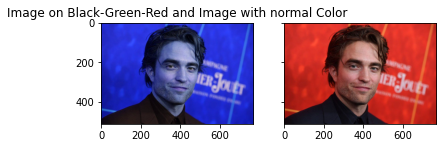

In [43]:
graficar(img)

Action: race: 100%|██████████| 4/4 [00:00<00:00,  5.08it/s]


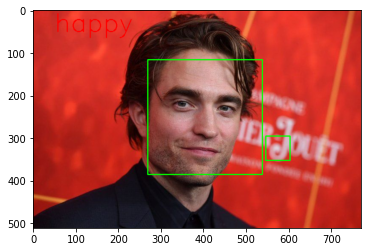

In [44]:
detection(img)
detresult(img, analysis(img))

In [45]:
#temp_pred = analysis(img2)
#print_pred(temp_prediction)
print_pred(analysis(img))

Action: race: 100%|██████████| 4/4 [00:00<00:00,  5.04it/s]


Dominant emotion: happy
Dominant race: white
Gender: Man
Age:  27


In [46]:
analysis(img)['gender']

Action: race: 100%|██████████| 4/4 [00:00<00:00,  5.06it/s]


'Man'

#Classify Images

In [47]:
import glob
import sys
#import pathlib
#from shutil import copyfile
#import shutil
#from sys import exit
from shutil import copyfile

CREATE OUTPUT FOLDERS

In [65]:
!rm -r resultados
#!rm -r '/content/Magaly_Project'
#!!rm -r '/content/rosGoo'
!mkdir resultados
!mkdir resultados/Man
!mkdir resultados/Woman

!mkdir resultados/Man/20s
!mkdir resultados/Woman/20s
!mkdir resultados/Man/30s
!mkdir resultados/Woman/30s
!mkdir resultados/Man/40s
!mkdir resultados/Woman/40s

!mkdir resultados/Man/20s/angry
!mkdir resultados/Woman/20s/angry
!mkdir resultados/Man/30s/angry
!mkdir resultados/Woman/30s/angry
!mkdir resultados/Man/40s/angry
!mkdir resultados/Woman/40s/angry

!mkdir resultados/Man/20s/disgust
!mkdir resultados/Woman/20s/disgust
!mkdir resultados/Man/30s/disgust
!mkdir resultados/Woman/30s/disgust
!mkdir resultados/Man/40s/disgust
!mkdir resultados/Woman/40s/disgust

!mkdir resultados/Man/20s/fear
!mkdir resultados/Woman/20s/fear
!mkdir resultados/Man/30s/fear
!mkdir resultados/Woman/30s/fear
!mkdir resultados/Man/40s/fear
!mkdir resultados/Woman/40s/fear

!mkdir resultados/Man/20s/happy
!mkdir resultados/Woman/20s/happy
!mkdir resultados/Man/30s/happy
!mkdir resultados/Woman/30s/happy
!mkdir resultados/Man/40s/happy
!mkdir resultados/Woman/40s/happy

!mkdir resultados/Man/20s/neutral
!mkdir resultados/Woman/20s/neutral
!mkdir resultados/Man/30s/neutral
!mkdir resultados/Woman/30s/neutral
!mkdir resultados/Man/40s/neutral
!mkdir resultados/Woman/40s/neutral

!mkdir resultados/Man/20s/sad
!mkdir resultados/Woman/20s/sad
!mkdir resultados/Man/30s/sad
!mkdir resultados/Woman/30s/sad
!mkdir resultados/Man/40s/sad
!mkdir resultados/Woman/40s/sad

!mkdir resultados/Man/20s/surprise
!mkdir resultados/Woman/20s/surprise
!mkdir resultados/Man/30s/surprise
!mkdir resultados/Woman/30s/surprise
!mkdir resultados/Man/40s/surprise
!mkdir resultados/Woman/40s/surprise

In [66]:
pred_path='/content/rosGoo'
target_man= '/content/resultados/Man'
target_woman= '/content/resultados/Woman'

#categories
images_path=glob.glob(pred_path+'/*.jpg')
num_total = 0
angry = 0
sad = 0
disgust = 0
fear = 0
happy = 0
neutral = 0
surprise = 0
man = 0
woman = 0
twenties = 0
thirties = 0
fourties = 0

In [67]:
def saving_results(currentPic,target):
  try:
      cv2.imwrite(currentPic, target)
  except IOError as e:
      print("Unable to copy file. %s" % e)
      exit(1)
  except:
      print("Unexpected error:", sys.exc_info())
      exit(1)

def deleting_results(picPath):
  filelist = glob.glob(os.path.join(picPath, "*.jpg"))
  for f in filelist:
    os.remove(f)


In [68]:
for i in images_path:
  print(i)
  b = analysis(i)
  print('genero:', b['gender'], ' .')
  res = i.partition(pred_path)[2]

  if(b['gender']== 'Man'):
    #print('direccion es: ',target_man+res," .")
    man= man+1
    if(b['age']< 30):
      twenties = twenties +1
      #print('direccion es: ',target_man+"20s"+b['dominant_emotion']+res," .")
      imgDet = jianze(cv2.imread(i))
      saving_results(target_man+"/20s/"+b['dominant_emotion']+res, imgDet)
    
    elif(b['age']< 40):
      #print('direccion es: ',target_man+"/30s/"+b['dominant_emotion']+res," .")
      thirties = thirties+1
      imgDet = jianze(cv2.imread(i))
      saving_results(target_man+"/30s/"+b['dominant_emotion']+res, imgDet)

    elif(b['age']>= 40):
      twenties = fourties +1
      #print('i es: ',target_man+"20s"+b['dominant_emotion']+res," .")
      imgDet = jianze(cv2.imread(i))
      saving_results(target_man+"/40s/"+b['dominant_emotion']+res, imgDet)



  if(b['gender']== 'Woman'):
    #print('direccion es: ',target_man+res," .")
    man= man+1
    if(b['age']< 30):
      twenties = twenties +1
      #print('direccion es: ',target_man+"20s"+b['dominant_emotion']+res," .")
      imgDet = jianze(cv2.imread(i))
      saving_results(target_woman+"/20s/"+b['dominant_emotion']+res, imgDet)
    
    elif(b['age']< 40):
      #print('i es: ',target_woman+"/30s/"+b['dominant_emotion']+res," .")
      thirties = thirties+1
      imgDet = jianze(cv2.imread(i))
      saving_results(target_woman+"/30s/"+b['dominant_emotion']+res, imgDet)

    elif(b['age']>= 40):
      twenties = fourties +1
      #print('i es: ',target_woman+"20s"+b['dominant_emotion']+res," .")
      imgDet = jianze(cv2.imread(i))
      saving_results(target_woman+"/40s/"+b['dominant_emotion']+res, imgDet)

      

/content/rosGoo/00000118.jpg


Action: race: 100%|██████████| 4/4 [00:00<00:00,  5.98it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:00<00:00,  5.99it/s]


/content/rosGoo/00000131.jpg


Action: race: 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:00<00:00,  5.16it/s]


/content/rosGoo/00000107.jpg


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.96it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:01<00:00,  4.00it/s]


/content/rosGoo/00000128.jpg


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]


/content/rosGoo/00000052.jpg


Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.74it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]


/content/rosGoo/00000070.jpg


Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.50it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.74it/s]


/content/rosGoo/00000053.jpg


Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]


/content/rosGoo/00000006.jpg


Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.56it/s]


/content/rosGoo/00000169.jpg


Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]


/content/rosGoo/00000112.jpg


Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]


/content/rosGoo/00000139.jpg


Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.97it/s]


/content/rosGoo/00000113.jpg


Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.35it/s]


genero: Woman  .


Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]


/content/rosGoo/00000081.jpg


Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.50it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]


/content/rosGoo/00000176.jpg


Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]


/content/rosGoo/00000082.jpg


Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]


/content/rosGoo/00000069.jpg


Action: race: 100%|██████████| 4/4 [00:00<00:00,  5.13it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]


/content/rosGoo/00000167.jpg


Action: race: 100%|██████████| 4/4 [00:00<00:00,  6.90it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:00<00:00,  6.89it/s]


/content/rosGoo/00000040.jpg


Action: race: 100%|██████████| 4/4 [00:00<00:00,  5.62it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:00<00:00,  6.18it/s]


/content/rosGoo/00000021.jpg


Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.28it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.42it/s]


/content/rosGoo/00000023.jpg


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.17it/s]


/content/rosGoo/00000035.jpg


Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]


/content/rosGoo/00000067.jpg


Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]


genero: Woman  .


Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]


/content/rosGoo/00000095.jpg


Action: race: 100%|██████████| 4/4 [00:00<00:00,  5.52it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]


/content/rosGoo/00000061.jpg


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.96it/s]


genero: Woman  .


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.96it/s]


/content/rosGoo/00000094.jpg


Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]


genero: Woman  .


Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.59it/s]


/content/rosGoo/00000014.jpg


Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]


/content/rosGoo/00000171.jpg


Action: race: 100%|██████████| 4/4 [00:00<00:00,  6.74it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:00<00:00,  6.93it/s]


/content/rosGoo/00000100.jpg


Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.33it/s]


/content/rosGoo/00000041.jpg


Action: race: 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:00<00:00,  5.80it/s]


/content/rosGoo/00000039.jpg


Action: race: 100%|██████████| 4/4 [00:00<00:00,  9.35it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:00<00:00,  7.74it/s]


/content/rosGoo/00000156.jpg


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.56it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.72it/s]


/content/rosGoo/00000187.jpg


Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.51it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.56it/s]


/content/rosGoo/00000003.jpg


Action: race: 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]


/content/rosGoo/00000090.jpg


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.41it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.29it/s]


/content/rosGoo/00000015.jpg


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.59it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.60it/s]


/content/rosGoo/00000073.jpg


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.54it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.56it/s]


/content/rosGoo/00000173.jpg


Action: race: 100%|██████████| 4/4 [00:00<00:00,  6.94it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:00<00:00,  7.10it/s]


/content/rosGoo/00000140.jpg


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.50it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.85it/s]


/content/rosGoo/00000165.jpg


Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.83it/s]


/content/rosGoo/00000135.jpg


Action: race: 100%|██████████| 4/4 [00:00<00:00,  7.24it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:00<00:00,  7.13it/s]


/content/rosGoo/00000121.jpg


Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]


/content/rosGoo/00000130.jpg


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.16it/s]


/content/rosGoo/00000108.jpg


Action: race: 100%|██████████| 4/4 [00:00<00:00,  6.01it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:00<00:00,  6.29it/s]


/content/rosGoo/00000043.jpg


Action: race: 100%|██████████| 4/4 [00:00<00:00,  6.24it/s]


genero: Woman  .


Action: race: 100%|██████████| 4/4 [00:00<00:00,  6.16it/s]


/content/rosGoo/00000189.jpg


Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]


/content/rosGoo/00000012.jpg


Action: race: 100%|██████████| 4/4 [00:00<00:00,  6.75it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:00<00:00,  7.00it/s]


/content/rosGoo/00000164.jpg


Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]


/content/rosGoo/00000031.jpg


Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.36it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]


/content/rosGoo/00000077.jpg


Action: race: 100%|██████████| 4/4 [00:00<00:00,  6.07it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:00<00:00,  6.04it/s]


/content/rosGoo/00000062.jpg


Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]


/content/rosGoo/00000000.jpg


Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.59it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.81it/s]


/content/rosGoo/00000007.jpg


Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]


genero: Woman  .


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.12it/s]


/content/rosGoo/00000001.jpg


Action: race: 100%|██████████| 4/4 [00:00<00:00,  6.14it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:00<00:00,  6.39it/s]


/content/rosGoo/00000005.jpg


Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]


/content/rosGoo/00000091.jpg


Action: race: 100%|██████████| 4/4 [00:00<00:00,  5.04it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:00<00:00,  5.67it/s]


/content/rosGoo/00000018.jpg


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]


genero: Man  .


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.12it/s]


/content/rosGoo/00000163.jpg


Action: emotion:   0%|          | 0/4 [00:00<?, ?it/s]

No face detected


UnboundLocalError: ignored

In [63]:
fruits = []

# 1. append()
print(f'Current Fruits List {fruits}')

f = input("Please enter a fruit name:\n")
fruits.append(f)

print(f'Updated Fruits List {fruits}')

Current Fruits List []
Please enter a fruit name:
dfdf
Updated Fruits List ['dfdf']


In [138]:
# Creates a list containing 5 lists, each of 8 items, all set to 0
e, s = 9, 9
MatrixMasc = [[0 for x in range(e)] for y in range(s)]
MatrixFem = [[0 for x in range(e)] for y in range(s)]

TypeError: ignored

In [139]:
contador1 = 0
contador2 = 0
edades = os.listdir("/content/resultados/Man/")
print (edades)
emocionesfldr = os.listdir("/content/resultados/Man/20s")
print (emocionesfldr)
for j in edades:
  print('\nAGE OF ' + j + ' :\n') 
  for i in emocionesfldr:
    print(i + ' Images:', len(os.listdir('/content/resultados/Man/' + j + '/'+i)),'\n') 
    if(j == '20s'):
      MatrixMasc[contador1][contador2] = len(os.listdir('/content/resultados/Man/' + j + '/'+i))
      contador2+=1
    if(j == '30s'):
      MatrixMasc[contador1][contador2] = len(os.listdir('/content/resultados/Man/' + j + '/'+i))
      contador2+=1
    if(j == '40s'):
      MatrixMasc[contador1][contador2] = len(os.listdir('/content/resultados/Man/' + j + '/'+i))
      contador2+=1
  contador1+=1
  contador2 = 0  

['30s', '20s', '40s']
['angry', 'neutral', 'fear', 'surprise', 'happy', 'sad', 'disgust']

AGE OF 30s :

angry Images: 2 

neutral Images: 10 

fear Images: 1 

surprise Images: 0 

happy Images: 5 

sad Images: 2 

disgust Images: 0 


AGE OF 20s :

angry Images: 1 

neutral Images: 15 

fear Images: 0 

surprise Images: 0 

happy Images: 6 

sad Images: 0 

disgust Images: 0 


AGE OF 40s :

angry Images: 1 

neutral Images: 2 

fear Images: 0 

surprise Images: 0 

happy Images: 4 

sad Images: 1 

disgust Images: 0 



In [127]:
contador1 = 0
contador2 = 0
edades = os.listdir("/content/resultados/Woman/")
print (edades)
emocionesfldr = os.listdir("/content/resultados/Woman/20s")
print (emocionesfldr)
for j in edades:
  print('\nAGE OF ' + j + ' :\n') 
  for i in emocionesfldr:
    print(i + ' Images:', len(os.listdir('/content/resultados/Woman/' + j + '/'+i)),'\n') 
    if(j == '20s'):
      MatrixFem[contador1][contador2] = len(os.listdir('/content/resultados/Woman/' + j + '/'+i))
      contador2+=1
    if(j == '30s'):
      MatrixFem[contador1][contador2] = len(os.listdir('/content/resultados/Woman/' + j + '/'+i))
      contador2+=1
    if(j == '40s'):
      MatrixFem[contador1][contador2] = len(os.listdir('/content/resultados/Woman/' + j + '/'+i))
      contador2+=1
  contador1+=1
  contador2 = 0

['30s', '20s', '40s']
['angry', 'neutral', 'fear', 'surprise', 'happy', 'sad', 'disgust']

AGE OF 30s :

angry Images: 0 

neutral Images: 0 

fear Images: 0 

surprise Images: 0 

happy Images: 0 

sad Images: 0 

disgust Images: 0 


AGE OF 20s :

angry Images: 0 

neutral Images: 4 

fear Images: 0 

surprise Images: 0 

happy Images: 1 

sad Images: 1 

disgust Images: 0 


AGE OF 40s :

angry Images: 0 

neutral Images: 0 

fear Images: 0 

surprise Images: 0 

happy Images: 0 

sad Images: 0 

disgust Images: 0 



In [128]:
#['30s', '20s', '40s']
#['angry', 'neutral', 'fear', 'surprise', 'happy', 'sad', 'disgust']
print(MatrixMasc[1][1])
print(MatrixFem[1][1])

15
4


In [142]:
#emociones de edad 20
contemociones= []
t = 0
while t < 7:
  contemociones.append(MatrixMasc[1][t])
  t += 1


[1, 15, 0, 0, 6, 0, 0]


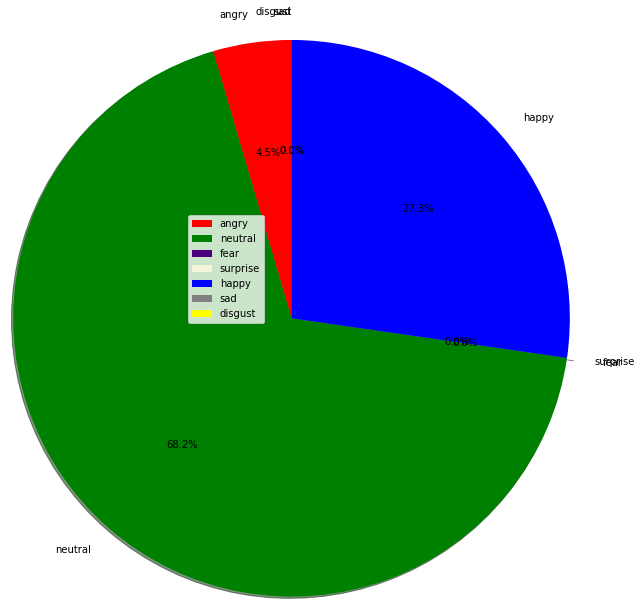

In [162]:

import matplotlib.pyplot as plt
print(contemociones)
# defining labels
activities = ['angry', 'neutral', 'fear', 'surprise', 'happy', 'sad', 'disgust']
  
# portion covered by each label
#emociones de edad 20
contemociones= []
t = 0
while t < 7:
  contemociones.append(MatrixMasc[1][t])
  t += 1
  
# color for each label
colors = ["red", "green", "indigo", "beige", 
          "blue", "grey","yellow"]

# plotting the pie chart
plt.pie(contemociones, labels = activities, colors=colors, 
        startangle=60, shadow = True, explode = (0, 0, 0.1, 0, 0, 0, 0),
        radius = 3.2, autopct = '%1.1f%%')
  
# plotting legend
plt.legend()
  
# showing the plot
plt.show()

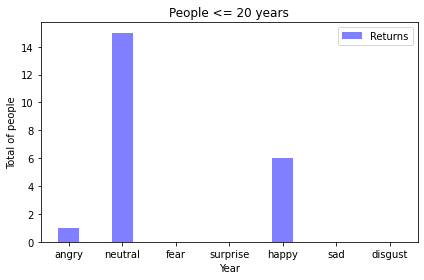

In [180]:

# import numpy and pyplot modules

import numpy as np

import matplotlib.pyplot as plotter

 

 

numberOfYears       = 7                     # Number of categories, variables



 

figureObejct, axesObject = plotter.subplots()

 

# X Axis categories

categories       = np.arange(numberOfYears)

 

# Customize bar properties

barWidth        = 0.4

barOpacity      = 0.5

errorConfig     = {'ecolor': '0.2'}

 

# Draw the bar chart depicting annual stock market returns with standard deviation

barChart = plotter.bar(categories,

                       contemociones,

                       barWidth,

                       alpha = barOpacity,

                       color = 'blue',


                       error_kw = errorConfig,

                       label = 'Returns')

 

# Fill the bar chart with information

plotter.xlabel('Year')

plotter.ylabel('Total of people')

plotter.title('People <= 20 years')

plotter.xticks(categories, ('angry', 'neutral', 'fear', 'surprise', 'happy', 'sad', 'disgust'))

plotter.legend()

 

plotter.tight_layout()

plotter.show()

In [134]:
for i in images_path:
  print(i)
  b = analysis(i)
  print('genero:', b['gender'], ' .')
  res = i.partition(pred_path)[2]
  #print(res)
  if(b['gender']== 'Man'):
    #print('direccion es: ',target_man+res," .")
    man= man+1
    if(b['age']< 21'):
      twenties = twenties +1
    elif(b['age']< '31'):
      thirties = thirties+1
      imgDet = jianze(cv2.imread(i))
      saving_results(target_man+res, imgDet)


  if(b['gender']== 'Woman'):
    #print('direccion es: ',target_man+res," .")
    imgDet = jianze(cv2.imread(i))
    saving_results(target_woman+res, imgDet)
  

/content/rosGoo/00000051.jpg


Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

genero: Man  .


TypeError: ignored

In [ ]:
daz = jianze(img)


Action: race: 100%|██████████| 4/4 [00:00<00:00,  7.81it/s]


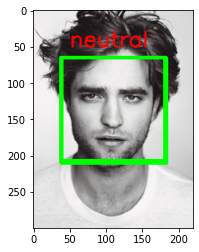

In [ ]:
gcolor(daz)

#start

In [ ]:
! wget 'https://cdn.pixabay.com/photo/2015/10/08/00/24/woman-977020_960_720.jpg'
img = cv2.imread('/content/woman-977020_960_720.jpg')


--2022-06-15 14:16:27--  https://cdn.pixabay.com/photo/2015/10/08/00/24/woman-977020_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.37.244, 172.64.150.12, 2606:4700:4400::ac40:960c, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.37.244|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93043 (91K) [image/jpeg]
Saving to: ‘woman-977020_960_720.jpg.1’

woman-977020_960_72 100%[===================>]  90.86K  --.-KB/s    in 0.002s  

2022-06-15 14:16:27 (36.9 MB/s) - ‘woman-977020_960_720.jpg.1’ saved [93043/93043]



In [ ]:
img2 = cv2.imread('Surprise.png')

NameError: ignored

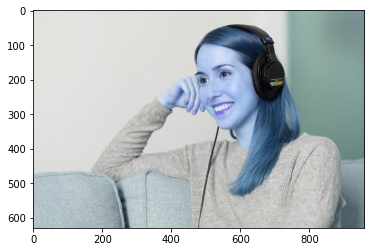

In [ ]:
plt.imshow(img) #open cv abre en bgr

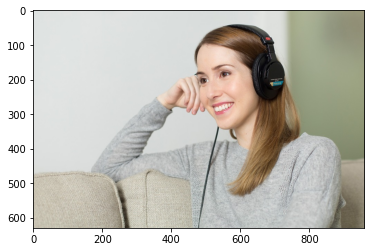

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #asi se abre normalmente

In [ ]:
predictions = DeepFace.analyze(img)

Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5


facial_expression_model_weights.h5 will be downloaded...


100%|██████████| 5.98M/5.98M [00:00<00:00, 120MB/s]
Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5


age_model_weights.h5 will be downloaded...


100%|██████████| 539M/539M [00:21<00:00, 25.1MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [01:03<00:00, 8.50MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:15<00:00, 35.2MB/s]
Action: race: 100%|██████████| 4/4 [00:12<00:00,  3.10s/it]


In [ ]:
predictions

{'age': 33,
 'dominant_emotion': 'happy',
 'dominant_race': 'white',
 'emotion': {'angry': 0.009774326463229954,
  'disgust': 6.586608947145578e-06,
  'fear': 0.047356318100355566,
  'happy': 99.27332401275635,
  'neutral': 0.41343551129102707,
  'sad': 0.1486602472141385,
  'surprise': 0.10744634782895446},
 'gender': 'Woman',
 'race': {'asian': 0.06850119098089635,
  'black': 0.006384714652085677,
  'indian': 0.18902334850281477,
  'latino hispanic': 18.348446488380432,
  'middle eastern': 12.512336671352386,
  'white': 68.87530088424683},
 'region': {'h': 227, 'w': 227, 'x': 412, 'y': 103}}

In [ ]:
type(predictions)

dict

In [ ]:
predictions['dominant_emotion']

'happy'

In [ ]:
!wget 'https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml'

--2022-06-11 15:42:20--  https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal     [ <=>                ]   9.72M  --.-KB/s    in 0.07s   

2022-06-11 15:42:21 (135 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [10195207]



**Intentamos dibujar un rectangulo al rededor del rostro**

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(face_cascade.empty())
faces = face_cascade.detectMultiScale(gray,1.1,4)

False


In [ ]:
#draw a rectangle around the face
for(x,y,w,h) in faces:
  cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0),2)

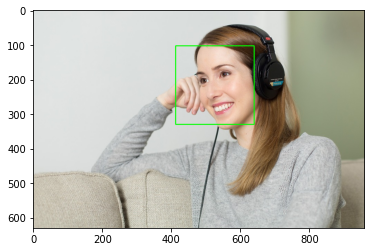

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX
  # usar el metodo putText() para
  # insertar el texto en el video
cv2.putText(img,
                  predictions['dominant_emotion'],
                  (50,50),
                  font, 1,
                  (0,0,255),
                  2,
                  cv2.LINE_4
              )

array([[[224, 225, 221],
        [224, 225, 221],
        [224, 225, 221],
        ...,
        [122, 151, 155],
        [122, 151, 155],
        [123, 152, 156]],

       [[224, 225, 221],
        [224, 225, 221],
        [224, 225, 221],
        ...,
        [122, 151, 155],
        [122, 151, 155],
        [123, 152, 156]],

       [[224, 225, 221],
        [224, 225, 221],
        [224, 225, 221],
        ...,
        [122, 151, 155],
        [122, 151, 155],
        [122, 151, 155]],

       ...,

       [[177, 193, 199],
        [181, 197, 203],
        [182, 198, 204],
        ...,
        [114, 133, 140],
        [114, 133, 140],
        [123, 142, 149]],

       [[175, 191, 197],
        [181, 197, 203],
        [182, 198, 204],
        ...,
        [112, 131, 138],
        [111, 130, 137],
        [119, 138, 145]],

       [[174, 190, 196],
        [180, 196, 202],
        [182, 198, 204],
        ...,
        [112, 131, 138],
        [110, 129, 136],
        [117, 136, 143]]

In [ ]:
predictions = DeepFace.analyze(img2)

Action: race: 100%|██████████| 4/4 [00:00<00:00,  7.81it/s]


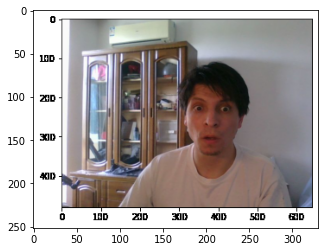

In [ ]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [ ]:
predictions

{'age': 37,
 'dominant_emotion': 'surprise',
 'dominant_race': 'white',
 'emotion': {'angry': 0.05916813265204338,
  'disgust': 6.747124276543834e-07,
  'fear': 19.47797602677631,
  'happy': 0.1207486931645938,
  'neutral': 1.3627078284454542e-05,
  'sad': 7.107522327171713e-05,
  'surprise': 80.34202094769228},
 'gender': 'Man',
 'race': {'asian': 3.5784509032964706,
  'black': 0.9426852688193321,
  'indian': 6.101380288600922,
  'latino hispanic': 19.49903815984726,
  'middle eastern': 26.82618796825409,
  'white': 43.05225908756256},
 'region': {'h': 73, 'w': 73, 'x': 170, 'y': 87}}

In [ ]:
predictions['dominant_emotion']

'surprise'

In [ ]:
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
print(face_cascade.empty())
faces = face_cascade.detectMultiScale(gray,1.1,4)

False


In [ ]:
#draw a rectangle around the face
for(x,y,w,h) in faces:
  cv2.rectangle(img2, (x,y), (x+w, y+h), (0,255,0),2)

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX
  # usar el metodo putText() para
  # insertar el texto en el video
cv2.putText(img2,
                  predictions['dominant_emotion'],
                  (50,50),
                  font, 1,
                  (0,0,255),
                  2,
                  cv2.LINE_4
              )

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

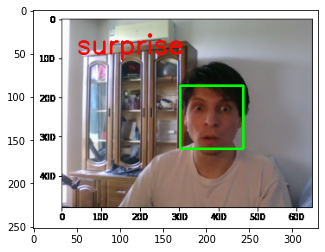

In [ ]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

#camera Code Snippet

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

#RealTime video face Emotion Recognition

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
cap = cv2.VideoCapture(1)
#check if the webcam is oponed correctly
if not cap.isOpened():
  cap = cv2.VideoCapture(0)
#  if not cap.isOpened():
#    raise IOError("cannot open webcam")

while True:
  ret,frame = cap.read()
  #take_photo()
  result = DeepFace.analyze(frame, actions = ['emotion'])

  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  #print(face_cascade.empty())
  faces = face_cascade.detectMultiScale(gray,1.1,4)
  #draw a rectangle around the face
  for(x,y,w,h) in faces:
    cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0),2)
  
  font = cv2.FONT_HERSHEY_SIMPLEX
  # usar el metodo putText() para
  # insertar el texto en el video
  cv2.putText(img2,
                  predictions['dominant_emotion'],
                  (50,50),
                  font, 1,
                  (0,0,255),
                  2,
                  cv2.LINE_4
              )
  cap.release()
  cv2.destroyAllWindows()

<IPython.core.display.Javascript object>

TypeError: ignored

In [ ]:
while(True):
	ret, frame = cap.read()
	gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
	cv2.imshow('frame',gray)
	if cv2.waitKey(1) & 0xFF == ord('q'):
	    break
cap.release()
cv2.destroyAllWindows() 

NameError: ignored

In [ ]:
cap=cv2.VideoCapture(1)
ret,frame=cap.read()
if frame is None:
    raise ValueError('Unable to get a frame!')
result= DeepFace.analyze(frame, actions = ['emotion'])

ValueError: ignored

In [ ]:
from IPython.display import display, Javascript,HTML
from google.colab.output import eval_js
from base64 import b64decode
 
def record_video(filename):
  js=Javascript("""
    async function recordVideo() {
      const options = { mimeType: "video/webm; codecs=vp9" };
      const div = document.createElement('div');
      const capture = document.createElement('button');
      const stopCapture = document.createElement("button");
       
      capture.textContent = "Start Recording";
      capture.style.background = "orange";
      capture.style.color = "white";
 
      stopCapture.textContent = "Stop Recording";
      stopCapture.style.background = "red";
      stopCapture.style.color = "white";
      div.appendChild(capture);
 
      const video = document.createElement('video');
      const recordingVid = document.createElement("video");
      video.style.display = 'block';
 
      const stream = await navigator.mediaDevices.getUserMedia({audio:true, video: true});
     
      let recorder = new MediaRecorder(stream, options);
      document.body.appendChild(div);
      div.appendChild(video);
 
      video.srcObject = stream;
      video.muted = true;
 
      await video.play();
 
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
 
      await new Promise((resolve) => {
        capture.onclick = resolve;
      });
      recorder.start();
      capture.replaceWith(stopCapture);
 
      await new Promise((resolve) => stopCapture.onclick = resolve);
      recorder.stop();
      let recData = await new Promise((resolve) => recorder.ondataavailable = resolve);
      let arrBuff = await recData.data.arrayBuffer();
       
      // stop the stream and remove the video element
      stream.getVideoTracks()[0].stop();
      div.remove();
 
      let binaryString = "";
      let bytes = new Uint8Array(arrBuff);
      bytes.forEach((byte) => {
        binaryString += String.fromCharCode(byte);
      })
    return btoa(binaryString);
    }
  """)
  try:
    display(js)
    data=eval_js('recordVideo({})')
    binary=b64decode(data)
    with open(filename,"wb") as video_file:
      video_file.write(binary)
    print(f"Finished recording video at:{filename}")
  except Exception as err:
    print(str(err))

In [ ]:
video_path = "test.mp4"
record_video(video_path)

<IPython.core.display.Javascript object>

Finished recording video at:test.mp4


In [ ]:
while True:
  #ret,frame = cap.read()
  #take_photo()
  result = DeepFace.analyze("test.mp4", actions = ['emotion'])

  gray = cv2.cvtColor("test.mp4", cv2.COLOR_BGR2GRAY)
  #print(face_cascade.empty())
  faces = face_cascade.detectMultiScale(gray,1.1,4)
  #draw a rectangle around the face
  for(x,y,w,h) in faces:
    cv2.rectangle("test.mp4", (x,y), (x+w, y+h), (0,255,0),2)
  
  font = cv2.FONT_HERSHEY_SIMPLEX
  # usar el metodo putText() para
  # insertar el texto en el video
  cv2.putText(img2,
                  predictions['dominant_emotion'],
                  (50,50),
                  font, 1,
                  (0,0,255),
                  2,
                  cv2.LINE_4
              )
  cap.release()
  cv2.destroyAllWindows()

AttributeError: ignored

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)
    DeepFace.stream(db_path = img)
    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

In [ ]:
asd= DeepFace.stream(db_path = "test.mp4")

Detector backend is  opencv
Emotion model loaded
Age model loaded
Gender model loaded
Facial attibute analysis models loaded in  7.43865966796875e-05  seconds


Finding embeddings: 0it [00:00, ?it/s]

Embeddings found for given data set in  0.014632225036621094  seconds


In [ ]:
type(asd)

NoneType

In [ ]:
asd['dominant_emotion']

TypeError: ignored